<a href="https://colab.research.google.com/github/sirishti746/Deep-Learning/blob/main/Binary_classification_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification with Keras

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion

In [ ]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/booking_train.csv"

In [ ]:
import pandas as pd
df = pd.read_csv(url1)
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


### Booking status is the target feature
0 means booking successful and 1 means booking cancelled

# Step 2 - Basic data quality checks

In [ ]:
df.shape

(42100, 19)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().sum()

,0
id,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

# Step 3 - separate x and y

In [ ]:
X = df.drop(columns=["id","booking_status"])
y=df['booking_status']

In [ ]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [ ]:
y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


# Apply preprocessing on X

In [ ]:
X.dtypes

,0
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,int64
required_car_parking_space,int64
room_type_reserved,int64
lead_time,int64
arrival_year,int64
arrival_month,int64


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")


In [ ]:
X_pre = num_pipe.fit_transform(X)

In [ ]:
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


# Step 5 - Train test and validation split

In [ ]:
from sklearn.model_selection import train_test_split

xtemp,xtest,ytemp,ytest = train_test_split(X_pre,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
xtemp.shape

(33680, 17)

In [ ]:
xtest.shape

(8420, 17)

splitting validation and train data

In [ ]:
xtrain,xval,ytrain,yval = train_test_split(xtemp,ytemp,test_size=0.2,random_state=42,stratify=ytemp)

In [ ]:
xtrain.shape

(26944, 17)

In [ ]:
xval.shape

(6736, 17)

In [ ]:
xtest.shape

(8420, 17)

In [ ]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
6060,0.151040,-0.313454,0.130259,1.122386,-0.40702,-0.160945,0.685890,-1.145799,-2.441040,1.557404,0.798456,-1.149928,-0.173408,-0.060506,-0.101479,-0.796106,-0.737691
9835,-1.753925,-0.313454,0.130259,-0.278849,-0.40702,-0.160945,-0.515173,0.124734,0.409661,-0.209778,-1.676659,-1.149928,-0.173408,-0.060506,-0.101479,-0.796106,0.552579
28120,2.056005,-0.313454,1.259332,0.421768,-0.40702,-0.160945,0.685890,-1.047116,0.409661,-1.976961,0.348435,0.428551,-0.173408,-0.060506,-0.101479,0.684828,-0.737691
25399,-1.753925,-0.313454,-0.998814,-1.680084,-0.40702,-0.160945,0.685890,-0.985440,0.409661,-0.563215,0.685950,5.163989,-0.173408,-0.060506,-0.101479,-2.815562,-0.737691
11140,0.151040,-0.313454,1.259332,0.421768,-0.40702,-0.160945,-0.515173,0.396110,0.409661,-0.916652,1.248477,0.428551,-0.173408,-0.060506,-0.101479,0.025677,0.552579


In [ ]:
ytrain.head()

,booking_status
6060,0
9835,0
28120,1
25399,0
11140,0


In [ ]:
xval.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15841,0.151040,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,-0.405683,0.409661,-0.916652,0.910961,-1.149928,-0.173408,-0.060506,-0.101479,-0.392215,0.552579
36665,0.151040,-0.313454,0.130259,0.421768,-0.40702,-0.160945,-0.515173,0.914191,0.409661,0.143658,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,-0.137764,1.842849
6995,0.151040,-0.313454,0.130259,1.823003,-0.40702,-0.160945,0.685890,-0.960770,0.409661,-1.270088,-0.551607,0.428551,-0.173408,-0.060506,-0.101479,1.051022,-0.737691
28115,0.151040,-0.313454,0.130259,0.421768,-0.40702,-0.160945,-0.515173,2.850828,0.409661,0.850531,-0.326596,-1.149928,-0.173408,-0.060506,-0.101479,-0.661476,-0.737691
13912,-1.753925,-0.313454,0.130259,0.421768,-0.40702,-0.160945,-0.515173,-0.010954,0.409661,-1.270088,-1.339143,-1.149928,-0.173408,-0.060506,-0.101479,-0.661476,-0.737691


In [ ]:
yval.head()

,booking_status
15841,0
36665,0
6995,1
28115,0
13912,0


In [ ]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
30007,0.151040,-0.313454,1.259332,-0.278849,-0.407020,-0.160945,-0.515173,1.370596,0.409661,0.143658,0.460940,0.428551,-0.173408,-0.060506,-0.101479,-0.222581,-0.737691
802,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,2.246400,0.409661,0.850531,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.392215,-0.737691
11035,0.151040,-0.313454,-0.998814,-0.979466,1.294624,-0.160945,-0.515173,0.112399,0.409661,0.850531,0.460940,0.428551,-0.173408,-0.060506,-0.101479,0.092454,0.552579
22309,2.056005,-0.313454,-0.998814,1.122386,-0.407020,-0.160945,0.685890,-0.307000,0.409661,-0.209778,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.940625,-0.737691
30695,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.297428,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,0.262088,0.552579


In [ ]:
ytest.head()

,booking_status
30007,0
802,1
11035,0
22309,1
30695,0


# Step 6 - Train the neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
model = Sequential(
    [
        Input(shape=(xtrain.shape[1],)),
        Dense(64,activation="relu",kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.3),
        Dense(32,activation="relu",kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.2),
        Dense(1,activation="sigmoid")
    ]
)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(
    optimizer = "adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
es = EarlyStopping(patience=10,monitor="val_loss",restore_best_weights=True)

In [ ]:
hist = model.fit(xtrain,ytrain,validation_data=(xval,yval),epochs=100,callbacks=[es])

Epoch 1/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7208 - loss: 0.6070 - val_accuracy: 0.7763 - val_loss: 0.5128
Epoch 2/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7748 - loss: 0.5168 - val_accuracy: 0.7810 - val_loss: 0.4908
Epoch 3/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7798 - loss: 0.4975 - val_accuracy: 0.7859 - val_loss: 0.4810
Epoch 4/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7824 - loss: 0.4889 - val_accuracy: 0.7841 - val_loss: 0.4792
Epoch 5/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7866 - loss: 0.4798 - val_accuracy: 0.7853 - val_loss: 0.4746
Epoch 6/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7864 - loss: 0.4812 - val_accuracy: 0.7865 - val_loss: 0.4724
Epoch 7/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7926 - loss: 0.4694 - val_accuracy: 0.7885 - val_loss: 0.4686
Epoch 8/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7919 - loss: 0.4656 - val_accu

plot the learning curve

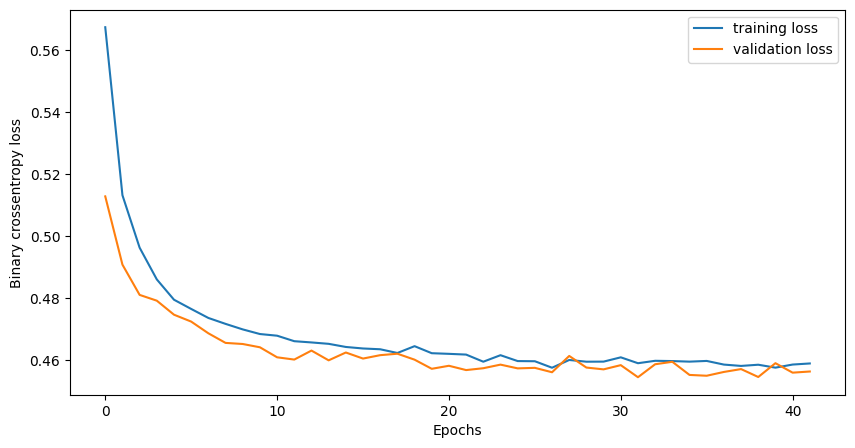

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(hist.history["loss"],label="training loss")
plt.plot(hist.history["val_loss"],label="validation loss")
plt.xlabel("Epochs")
plt.ylabel("Binary crossentropy loss")
plt.legend()
plt.show()

In [ ]:
model.evaluate(xtrain,ytrain)

842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8041 - loss: 0.4424


[0.4438600242137909, 0.8031101822853088]

In [ ]:
model.evaluate(xval,yval)

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7903 - loss: 0.4593


[0.4544546604156494, 0.794536828994751]

In [ ]:
model.evaluate(xtest,ytest)

264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8003 - loss: 0.4508


[0.4500679075717926, 0.7979810237884521]

In [ ]:
ypred_train = model.predict(xtrain)

842/842 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
ypred_trai

array([[0.00801173],
       [0.08032715],
       [0.58621126],
       [0.09238506],
       [0.20913374]], dtype=float32)